In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d hari31416/food-101

100% 4.66G/4.66G [04:18<00:00, 22.6MB/s]
100% 4.66G/4.66G [04:18<00:00, 19.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/food-101.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = "/content/food-101/train"
test_path  = "/content/food-101/validation"

In [ ]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

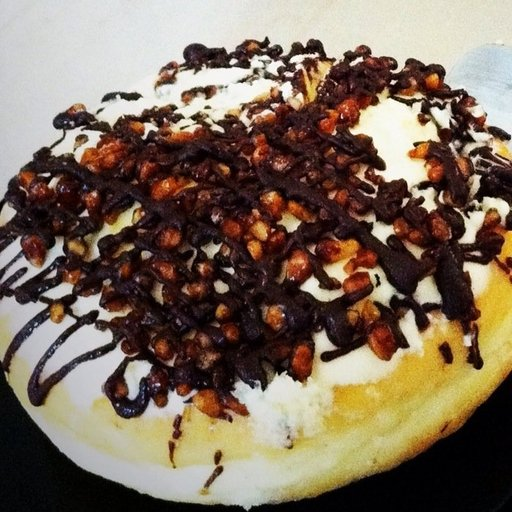

(512, 512, 3)

In [ ]:
img = cv2.imread("/content/food-101/train/donuts/1007399.jpg")
cv2_imshow(img)
img.shape

In [ ]:
from PIL import Image, UnidentifiedImageError
import os

# Path to the directory containing the images
directory = '/content/food-101'

# Iterate over each image in the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file is an image
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            # Open the image file
            image_path = os.path.join(root, file)

            try:
                image = Image.open(image_path)

                # Resize the image
                resized_image = image.resize((120, 120))

                # Save the resized image as JPEG, overwriting the original file
                resized_image.save(image_path)
                print(f"Resized {file} to 120x120 and saved as JPEG")

            except UnidentifiedImageError as e:
                print(f"Skipped {file} due to UnidentifiedImageError: {e}")
            except OSError as e:
                print(f"Skipped {file} due to OSError: {e}")


Streaming output truncated to the last 5000 lines.
Resized 3723591.jpg to 120x120 and saved as JPEG
Resized 1887196.jpg to 120x120 and saved as JPEG
Resized 1699748.jpg to 120x120 and saved as JPEG
Resized 2769513.jpg to 120x120 and saved as JPEG
Resized 1969711.jpg to 120x120 and saved as JPEG
Resized 149937.jpg to 120x120 and saved as JPEG
Resized 1720542.jpg to 120x120 and saved as JPEG
Resized 1234597.jpg to 120x120 and saved as JPEG
Resized 1929694.jpg to 120x120 and saved as JPEG
Resized 3511553.jpg to 120x120 and saved as JPEG
Resized 1764839.jpg to 120x120 and saved as JPEG
Resized 1661512.jpg to 120x120 and saved as JPEG
Resized 2140562.jpg to 120x120 and saved as JPEG
Resized 2596593.jpg to 120x120 and saved as JPEG
Resized 2283249.jpg to 120x120 and saved as JPEG
Resized 2671983.jpg to 120x120 and saved as JPEG
Resized 810538.jpg to 120x120 and saved as JPEG
Resized 2601956.jpg to 120x120 and saved as JPEG
Resized 3199913.jpg to 120x120 and saved as JPEG
Resized 9053.jpg to 

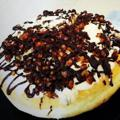

(120, 120, 3)

In [ ]:
|

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(320,370,3)))


model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))


model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))
model.add(Dropout(0.5))



model.add(Flatten())

model.add(Dense(2000,activation='relu'))

model.add(Dense(1000,activation='relu'))

model.add(Dense(101,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss = "binary_crossentropy" ,optimizer = "SGD" ,metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale =1./255,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'

)

test_datagen  = ImageDataGenerator (
                      rescale =1./255
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(320,370),
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(320,370),
    class_mode='categorical',
    shuffle=True
)

In [ ]:
history = model.fit(train_generator,

                    epochs=5,
                    validation_data=test_generator,
                    )

Epoch 1/10
2999/2999 [==============================] - 495s 161ms/step - loss: 4.4867 - accuracy: 0.0307 - val_loss: 4.2548 - val_accuracy: 0.0677
Epoch 2/10
2999/2999 [==============================] - 480s 160ms/step - loss: 4.1360 - accuracy: 0.0796 - val_loss: 4.0063 - val_accuracy: 0.0964
Epoch 3/10
2999/2999 [==============================] - 478s 159ms/step - loss: 3.9562 - accuracy: 0.1065 - val_loss: 3.8360 - val_accuracy: 0.1222
Epoch 4/10
2999/2999 [==============================] - 481s 160ms/step - loss: 3.8276 - accuracy: 0.1277 - val_loss: 3.7680 - val_accuracy: 0.1358
Epoch 5/10
2999/2999 [==============================] - 481s 160ms/step - loss: 3.7069 - accuracy: 0.1472 - val_loss: 3.6403 - val_accuracy: 0.1570
Epoch 6/10
2999/2999 [==============================] - 479s 160ms/step - loss: 3.5969 - accuracy: 0.1666 - val_loss: 3.5458 - val_accuracy: 0.1709
Epoch 7/10
2999/2999 [==============================] - 481s 160ms/step - loss: 3.5031 - accuracy: 0.1819 - val_

In [ ]:
import numpy as np
import pandas as pd
test_img = cv2.imread('/content/food-101/train/donuts/1007399.jpg')
test_img = cv2.resize(test_img,(120,120))
test_input1 = test_img.reshape((1,120,120,3))
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)

1/1 [==============================] - 0s 253ms/step
69


In [ ]:
import os
folder = '/content/food-101/train'
sub_folder = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]

In [ ]:
sub_folder[69]

'pizza'